# WeatherPy
----
## Final Script and Analysis


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
from api_keys import weather_api_key
# Build query url
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

In [5]:
# Empty lists for the API data
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_name = []
date_weather = []

# Set counter
process_num = 1

# Print statements
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop thru cities
for city in cities: 
    # Try to append values if found except any KeyError results    
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])                  
        # Convert dt UTC values into Month/Day/Year format
        date_weather.append(datetime.fromtimestamp(response['dt']).strftime('%m/%d/%y'))

        print(f"Processing Record {process_num} | {city}")

        process_num = process_num + 1
        # Due to call limits
        time.sleep(1.30)
                            
    except KeyError: 
        print('City not found. Skipping...')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | lasa
Processing Record 2 | albany
Processing Record 3 | de-kastri
Processing Record 4 | kavieng
Processing Record 5 | san patricio
Processing Record 6 | ribeira grande
Processing Record 7 | naze
Processing Record 8 | meiningen
Processing Record 9 | aykino
Processing Record 10 | lebu
Processing Record 11 | alice springs
Processing Record 12 | ballina
Processing Record 13 | punta arenas
Processing Record 14 | yellowknife
Processing Record 15 | arraial do cabo
Processing Record 16 | busselton
Processing Record 17 | mountain home
Processing Record 18 | quthing
Processing Record 19 | hualmay
Processing Record 20 | bluff
Processing Record 21 | khatanga
Processing Record 22 | komsomolskiy
Processing Record 23 | lahaina
Processing Record 24 | dinan
Processing Record 25 | codrington
Processing Record 26 | trani
Processing Record 27 | barrow
Processing Record 28 | beidao
Processing Record 29 | port alfred
Processing Rec

Processing Record 232 | athens
Processing Record 233 | fairbanks
Processing Record 234 | si sa ket
Processing Record 235 | janauba
Processing Record 236 | port hedland
Processing Record 237 | liancheng
City not found. Skipping...
Processing Record 238 | cherskiy
Processing Record 239 | kurumkan
Processing Record 240 | bilma
City not found. Skipping...
Processing Record 241 | necochea
Processing Record 242 | trabzon
City not found. Skipping...
Processing Record 243 | yangjiang
Processing Record 244 | bani walid
Processing Record 245 | sorong
Processing Record 246 | nelson bay
Processing Record 247 | havelock
Processing Record 248 | ostrovnoy
City not found. Skipping...
Processing Record 249 | sambava
City not found. Skipping...
City not found. Skipping...
Processing Record 250 | tuktoyaktuk
Processing Record 251 | saint anthony
Processing Record 252 | amapa
Processing Record 253 | shirokiy
Processing Record 254 | tazovskiy
Processing Record 255 | constitucion
Processing Record 256 | tes

Processing Record 468 | nanortalik
Processing Record 469 | makakilo city
Processing Record 470 | brookings
Processing Record 471 | rusape
Processing Record 472 | sibolga
Processing Record 473 | jilib
Processing Record 474 | taquari
Processing Record 475 | sobral
Processing Record 476 | proletariy
Processing Record 477 | tuatapere
Processing Record 478 | zhigansk
Processing Record 479 | harper
Processing Record 480 | waitati
Processing Record 481 | coihaique
Processing Record 482 | sept-iles
Processing Record 483 | taoudenni
Processing Record 484 | meadow lake
Processing Record 485 | kilindoni
Processing Record 486 | bud
City not found. Skipping...
Processing Record 487 | tommot
Processing Record 488 | coquimbo
Processing Record 489 | dalvik
Processing Record 490 | palmer
Processing Record 491 | carauari
Processing Record 492 | cockburn town
Processing Record 493 | fandriana
Processing Record 494 | candeias
Processing Record 495 | berdigestyakh
Processing Record 496 | moerai
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Check how many results came out from Openweathermap out of the city list obtained from citipy
cities_retrieved = len(city_name)
print(f"A total of {cities_retrieved} cities with weather data was obtained for analysis")

A total of 561 cities with weather data was obtained for analysis


In [12]:
# Display Data frame with column units based on Openweathermap documentations
raw_data = {'City':city_name, 'Latitude': latitude, 'Longitude': longitude,
              'MaxTemp (°C)': max_temp, 'Humidity (%)': humidity, 'Cloudiness (%)': cloudiness,
              'WindSpeed (meter/sec)': wind_speed, 'Country': country_name, 'Date': date_weather}

weather_df = pd.DataFrame(raw_data)
weather_df.head()

,City,Latitude,Longitude,MaxTemp (°C),Humidity (%),Cloudiness (%),WindSpeed (meter/sec),Country,Date
0,Laas,46.62,10.70,8.00,87,40,3.60,IT,06/18/20
1,Albany,42.60,-73.97,20.00,72,63,0.88,US,06/18/20
2,De-Kastri,51.47,140.78,8.60,92,100,3.19,RU,06/18/20
3,Kavieng,-2.57,150.80,29.92,68,27,3.71,PG,06/18/20
4,San Patricio,19.22,-104.70,26.49,64,17,1.31,MX,06/18/20


In [22]:
# Check each columns' value count and any NaN values
print(weather_df.count())
print(weather_df.isna().sum())

City                     561
Latitude                 561
Longitude                561
MaxTemp (°C)             561
Humidity (%)             561
Cloudiness (%)           561
WindSpeed (meter/sec)    561
Country                  561
Date                     561
dtype: int64
City                     0
Latitude                 0
Longitude                0
MaxTemp (°C)             0
Humidity (%)             0
Cloudiness (%)           0
WindSpeed (meter/sec)    0
Country                  0
Date                     0
dtype: int64


In [235]:
# Export data to csv 
weather_df.to_csv('../output_data/weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# Check the statistic summary / inspect the maximum humidity value
weather_df.describe()

,Latitude,Longitude,MaxTemp (°C),Humidity (%),Cloudiness (%),WindSpeed (meter/sec)
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,18.496791,17.083619,20.533226,66.994652,45.167558,3.780499
std,33.782078,90.511162,8.191038,23.285073,39.267495,2.504226
min,-54.800000,-179.170000,-5.000000,3.000000,0.000000,0.090000
25%,-10.070000,-63.600000,15.000000,54.000000,1.000000,1.930000
50%,21.050000,23.700000,21.950000,72.000000,40.000000,3.100000
75%,48.520000,95.320000,26.480000,85.000000,88.000000,5.100000
max,78.220000,176.630000,40.440000,100.000000,100.000000,14.450000


In [37]:
Max_humidity = weather_df['Humidity (%)'].max()
print(f"The maximum humidity value in the data set is equal to {Max_humid},")
print(f"there are no cities with > 100% humidity to remove.")

The maximum humidity value in the data set is equal to 100,
there are no cities with > 100% humidity to remove.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

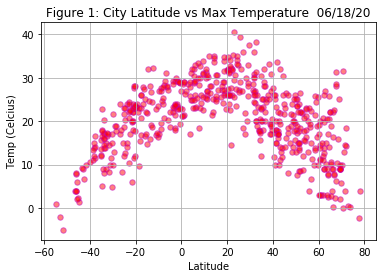

In [110]:
weather_date = weather_df['Date'][0]
plt.scatter(weather_df['Latitude'], weather_df['MaxTemp (°C)'], marker='o',color='r', edgecolor='m', alpha=0.5, s=30)
plt.title(f"Figure 1: City Latitude vs Max Temperature  {weather_date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Temp (Celcius)")
plt.grid(True)
plt.savefig('../output_data/Fig1_LatitudeVsTemperature.png')
plt.show()

## Latitude vs. Temperature Analysis

Figure 1 illustrates that the city's locations are situated somewhere between the latitude range of -60° at the South Pole and +80° at the North Pole of the Equator. 

According to the National Geographic channel, there's a relationship between temperature and latitude around the world, as temperatures are typically warmer approaching the Equator. There are variations, though, as other factors such as elevation, ocean currents, and precipitation will still affect climate patterns. 

The graphical plots depict a curve form rather than a straight line. It supports the variations brought about by other factors affecting climate patterns. One variable does not increase at a constant rate and may even start decreasing at a certain point.  

## Latitude vs. Humidity Plot

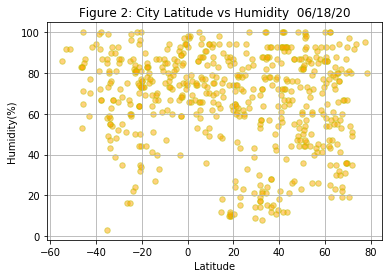

In [112]:
weather_date = weather_df['Date'][0]
plt.scatter(weather_df['Latitude'],weather_df['Humidity (%)'],marker='o',color='orange',edgecolor='y', alpha=0.5, s=30)
plt.title(f"Figure 2: City Latitude vs Humidity  {weather_date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Humidity(%)")
plt.grid(True)
plt.savefig('../output_data/Fig2_LatitudeVsHumidity.png')
plt.show()

## Latitude vs. Humidity Analysis

Figure 2 illustrates that humidity does not correlate strongly with latitude. The plots are scattered mostly between 60% to around 90% humidity readings.  

It is believed that when relative humidity reaches 100%, the air is totally saturated with water vapor and more likely to rain. 

## Latitude vs. Cloudiness Plot

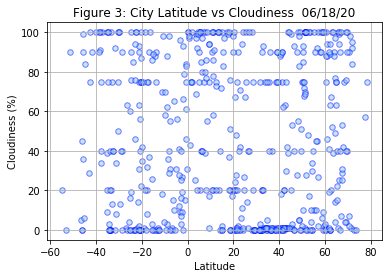

In [116]:
weather_date = weather_df['Date'][0]
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness (%)'],marker='o',color='lightskyblue',edgecolor='b', alpha=0.5, s=30)
plt.title(f"Figure 3: City Latitude vs Cloudiness  {weather_date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.grid(True)
plt.savefig('../output_data/Fig3_LatitudeVsCloudiness.png')
plt.show()

## Latitude vs. Cloudiness Analysis

Figure 3 illustrates that cloudiness rate does not have any correlation with latitude. But it appears to have colletion points along 0%, 75% and 100% readings.

## Latitude vs. Wind Speed Plot

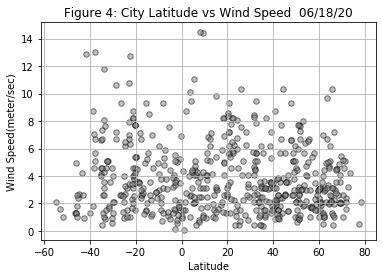

In [118]:
weather_date = weather_df['Date'][0]
plt.scatter(weather_df['Latitude'],weather_df['WindSpeed (meter/sec)'],marker='o',color='grey',edgecolor='black', alpha=0.5, s=30)
plt.title(f"Figure 4: City Latitude vs Wind Speed  {weather_date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Wind Speed(meter/sec)")
plt.grid(True)
plt.savefig('../output_data/Fig4_LatitudeVsWindspeed.png')
plt.show()

## Latitude vs. Wind Analysis

Figure 4 illustrates that wind speed does not have any correlation with latitude. 

It shows that the speed of wind has been going at 0-5 meters/sec rate regardless of the city's latitude at the time the information was collected.

## Linear Regression

In [195]:
# Function will include the list of latitude, indicators, x & y values, hemisphere type,
  # saving png file, and position of equation line annotation
def linregres_func(latitude, indicator, x_variable, y_variable, hem, savefile, horizon, verti):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, indicator)
    regress_values = latitude * slope + intercept
    eq_line = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    
    plt.scatter(latitude, indicator, color='lightseagreen')
    plt.plot(latitude, regress_values, 'r-')
    plt.annotate(eq_line, (horizon, verti), fontsize=14, color='r')
    plt.title(f"{hem} {x_variable} vs {y_variable} \n{weather_date}")
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f'../output_data/{savefile}')
    plt.show()

## Northern and Southern Hemisphere Dataframe

The line of latitude midway between the northern and southern hemispheres is called the equator. It defines the line of zero latitude. 

Latitude values are measured relative to the equator and it range from -90° at the South Pole to +90° at the North Pole. 

In [155]:
# In lieu of above statements, Northern and Southern Hemisphere Dataframes will be:
north_hem = weather_df.loc[(weather_df['Latitude']>=0), :]
south_hem = weather_df.loc[(weather_df['Latitude']<0), :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6796192646792054


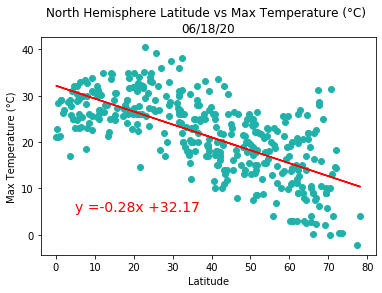

In [223]:
# Optimize code using function
linregres_func(north_hem['Latitude'],north_hem['MaxTemp (°C)'],"Latitude", "Max Temperature (°C)",
              'North Hemisphere', 'Fig5_linear.png', 5, 5)

"Max Temperature vs. Latitude Linear Regression" in the Northern Hemisphere showed a moderately negative correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7694826470098223


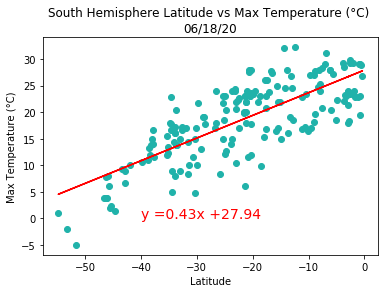

In [224]:
# Optimize code using function
linregres_func(south_hem['Latitude'],south_hem['MaxTemp (°C)'],"Latitude", "Max Temperature (°C)",
              'South Hemisphere', 'Fig6_linear.png', -40, 0)

On the other hand, "Max Temperature vs. Latitude Linear Regression" in the Southern Hemisphere showed a nearly strong postive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07948949028100516


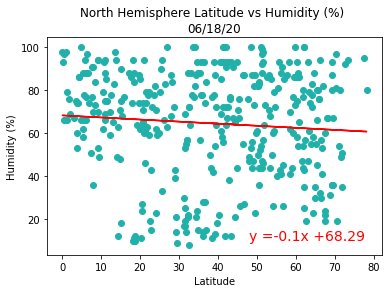

In [225]:
# Optimize code using function
linregres_func(north_hem['Latitude'],north_hem['Humidity (%)'],"Latitude", "Humidity (%)",
              'North Hemisphere', 'Fig7_linear.png', 48, 10)

"Humidity vs. Latitude" in the Northern Hemisphere showed no linear relationship, as the r-squared value is almost equal to zero.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028335475231231616


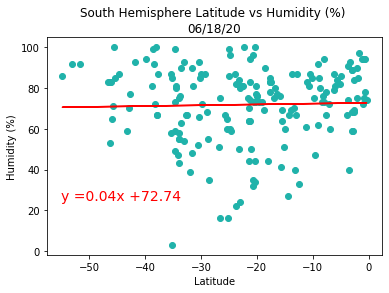

In [226]:
# Optimize code using function
linregres_func(south_hem['Latitude'],south_hem['Humidity (%)'],"Latitude", "Humidity (%)",
              'South Hemisphere', 'Fig8_linear.png', -55, 25)

Likewise, "Humidity vs. Latitude" in the Southern Hemisphere also showed no linear relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07032392211028927


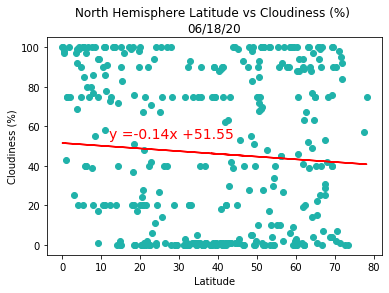

In [227]:
# Optimize code using function
linregres_func(north_hem['Latitude'],north_hem['Cloudiness (%)'],"Latitude", "Cloudiness (%)",
              'North Hemisphere', 'Fig9_linear.png', 12, 54)

"Cloudiness vs. Latitude" in the Northern Hemisphere had no significant correlation based on the r-squared value. Visually, the plots appear very scattered.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10578353543672005


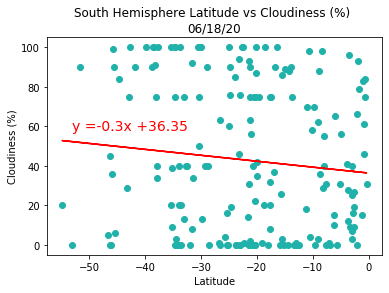

In [228]:
# Optimize code using function
linregres_func(south_hem['Latitude'],south_hem['Cloudiness (%)'],"Latitude", "Cloudiness (%)",
              'South Hemisphere', 'Fig10_linear.png', -53, 58)

In the same manner, "Cloudiness vs. Latitude" in the Southern Hemisphere also had no significant correlation as indicated by its r-squared value. The plots appear no visible trend or shape. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12785802394504434


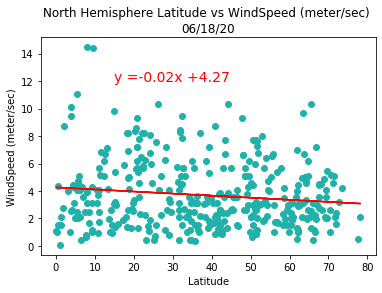

In [229]:
# Optimize code using function
linregres_func(north_hem['Latitude'],north_hem['WindSpeed (meter/sec)'],"Latitude", "WindSpeed (meter/sec)",
              'North Hemisphere', 'Fig11_linear.png', 15, 12)

"Wind Speed vs. Latitude Linear Regression" in the Northern Hemisphere showed no linear relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07457432508440644


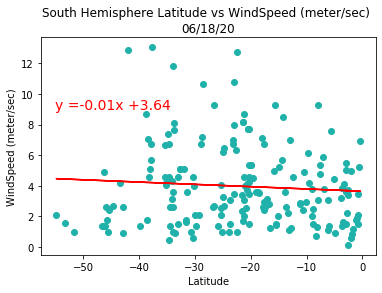

In [230]:
# Optimize code using function
linregres_func(south_hem['Latitude'],south_hem['WindSpeed (meter/sec)'],"Latitude", "WindSpeed (meter/sec)",
              'South Hemisphere', 'Fig12_linear.png', -55, 9)

"Wind Speed vs. Latitude Linear Regression" in the Southern Hemisphere similarly showed no linear relationship.